In [176]:
import pandas as pd

twitter202002 = pd.read_csv("tweet_activity_metrics_light940_20200201_20200301_ja.csv", sep=",")
twitter202003 = pd.read_csv("tweet_activity_metrics_light940_20200301_20200323_ja.csv", sep=",")
twitter_all = pd.concat([twitter202002, twitter202003])
# 必要なデータだけピックアップ
twitter_all_simple = twitter_all[['ツイートID', 
                                  'ツイート本文', 
                                  '時間', 
                                  'インプレッション', 
                                  'エンゲージメント',
                                  'エンゲージメント率',
                                  'リツイート',
                                  '返信',
                                  'いいね']]
# twitter_all_simple

In [177]:
# twitter_all_simple.sort_values('いいね', ascending=False)

In [178]:
import datetime

# 時間を3つに分類
def cast_date(x):
    hour = int(str(x)[11:13])
    if hour >= 6 and hour < 12:
        return '朝'
    elif hour >= 12 and hour < 18:
        return '昼'
    elif (hour >= 18 and hour <= 24) or (hour >= 0 and hour < 6):
        return '夜'

# 時間を切り取る
def cut_hour(x):
    datetime_utc = datetime.datetime.strptime(x, "%Y-%m-%d %H:%M %z")
    datetime_jst = datetime_utc.astimezone(datetime.timezone(datetime.timedelta(hours=+9)))
    return datetime_jst.hour

twitter_all_add_date = twitter_all_simple.copy()
# twitterAllAddDate['朝昼夜'] = twitterAllSimple['時間'].apply(lambda x : castDate(x))
twitter_all_add_date['時'] = twitter_all_simple['時間'].apply(lambda x : cut_hour(x))

# twitterAllSimple['いいね'].apply(lambda x : x*20)
# twitterAllSimple = twitterAllSimple.apply(lambda x : x['いいね']*20, axis=1)
# twitterAllSimple.dtypes
# twitter_all_add_date
# twitterAllSimple

In [179]:
# twitter_all_add_date.groupby('時').mean()
# twitter_all_add_date.groupby('時').sum()
# twitter_all_add_date.groupby('時').count()

* [matplotlib でヒストグラムを描く](https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0)
* [matplotlibのレイアウト調節](https://qiita.com/aurueps/items/d04a3bb127e2d6e6c21b)

Text(0, 0.5, 'tweet count')

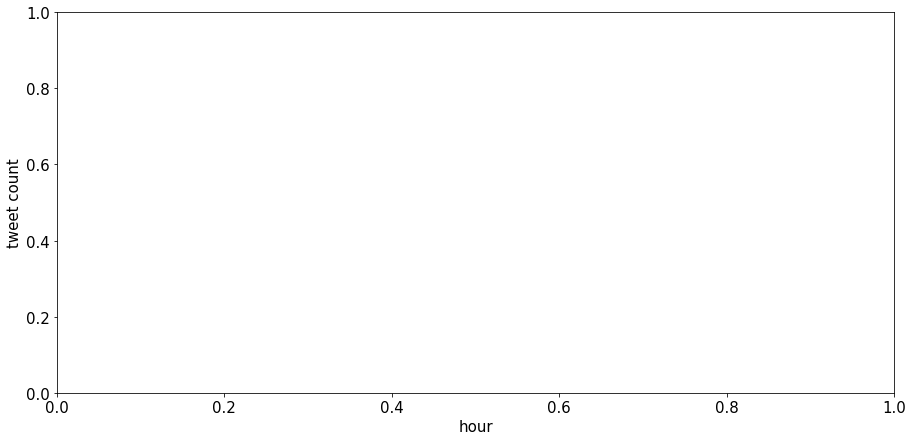

In [181]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(facecolor="w")
# ax.plot(x, y)

x = twitter_all_add_date['時']
plt.rcParams["figure.figsize"] = [15,7] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["font.size"] = 15 # フォントサイズ デフォルト12
plt.xlabel("hour")
plt.ylabel("tweet count")
# plt.hist(x, rwidth=0.7, bins=24)